In [1]:
from resonance.linear_systems import SingleDoFLinearSystem

msd_sys = SingleDoFLinearSystem()

In [2]:
msd_sys.constants['m'] = 1.0  # kg
msd_sys.constants['fn'] = 1.0  # Hz
msd_sys.constants['zeta'] = 0.1  # unitless

msd_sys.constants

{'m': 1.0, 'fn': 1.0, 'zeta': 0.1}

In [3]:
msd_sys.coordinates['x'] = 1.0  # m
msd_sys.speeds['v'] = 0.0  # m/s

In [4]:
msd_sys.coordinates

{'x': 1.0}

In [5]:
msd_sys.speeds

{'v': 0.0}

In [6]:
msd_sys.states

{'x': 1.0, 'v': 0.0}

In [7]:
import numpy as np

def calculate_canonical_coefficients(m, fn, zeta):
    """Returns the system's mass, damping, and stiffness coefficients given
    the system's constants."""
    wn = 2*np.pi*fn
    k = m*wn**2
    c = zeta*2*wn*m
    return m, c, k

msd_sys.canonical_coeffs_func = calculate_canonical_coefficients

In [8]:
msd_sys.canonical_coefficients()

(1.0, 1.2566370614359172, 39.47841760435743)

In [9]:
msd_sys.period()

1.005037815259212

In [10]:
msd_sys

System name: SingleDoFLinearSystem

Canonical coefficients function defined: True
Configuration plot function defined: False
Configuration update function defined: False

Constants
m = 1.00000
fn = 1.00000
zeta = 0.10000

Coordinates
x = 1.00000

Speeds
v = d(x)/dt = 0.00000

Measurements

In [11]:
msd_sys.coordinates['x'] = -5.0
msd_sys.speeds['v'] = 8.0

In [12]:
trajectories = msd_sys.free_response(5.0)
trajectories

x       x_acc          v
time                                 
0.00 -5.000000  187.338992   8.000000
0.01 -4.910728  181.496514   9.844723
0.02 -4.803311  175.015195  11.627801
0.03 -4.678398  167.928429  13.343009
0.04 -4.536697  160.271570  14.984469
...        ...         ...        ...
4.96 -0.217071    8.839775  -0.214970
4.97 -0.218780    8.796369  -0.126761
4.98 -0.219609    8.719006  -0.039156
4.99 -0.219566    8.608415   0.047509
5.00 -0.218663    8.465444   0.132905

[501 rows x 3 columns]

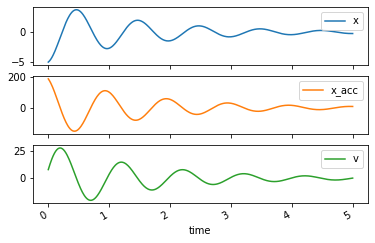

In [13]:
axes = trajectories.plot(subplots=True)

In [14]:
msd_sys.coordinates['x'] = 1.0
msd_sys.speeds['v'] = 0.0

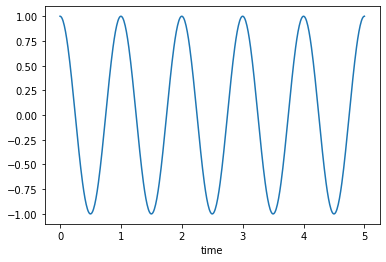

In [15]:
msd_sys.constants['zeta'] = 0.0  # Unitless
trajectories = msd_sys.free_response(5.0)
axes = trajectories['x'].plot()

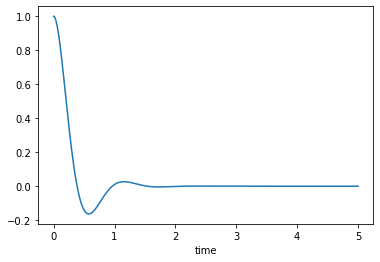

In [16]:
msd_sys.constants['zeta'] = 0.5  # Unitless
trajectories = msd_sys.free_response(5.0)
axes = trajectories['x'].plot()

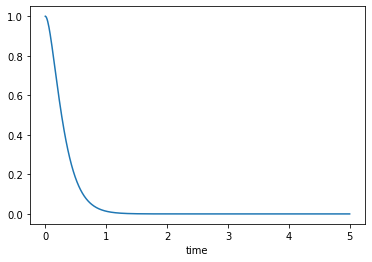

In [17]:
msd_sys.constants['zeta'] = 1.0  # Unitless
trajectories = msd_sys.free_response(5.0)
axes = trajectories['x'].plot()

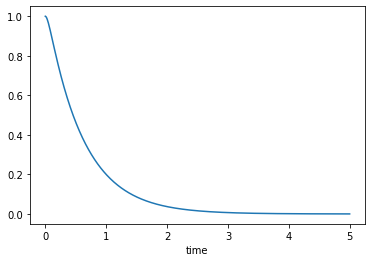

In [18]:
msd_sys.constants['zeta'] = 2.0  # Unitless
trajectories = msd_sys.free_response(5.0)
axes = trajectories['x'].plot()

In [19]:
def calculate_kinetic_energy(m, v):
   return m*v**2/2

msd_sys.add_measurement('KE', calculate_kinetic_energy)

In [20]:
msd_sys.constants['zeta'] = 0.5  # Unitless
trajectories = msd_sys.free_response(5.0)
trajectories

x      x_acc             v            KE
time                                                     
0.00  1.000000e+00 -39.478418  8.881784e-16  3.944305e-31
0.01  9.980674e-01 -36.999522 -3.823857e-01  7.310941e-02
0.02  9.924348e-01 -34.530060 -7.400220e-01  2.738162e-01
0.03  9.833490e-01 -32.078904 -1.073048e+00  5.757160e-01
0.04  9.710551e-01 -29.654314 -1.381689e+00  9.545318e-01
...            ...        ...           ...           ...
4.96  4.648115e-08   0.000006 -1.189485e-06  7.074377e-13
4.97  3.487003e-08   0.000006 -1.132570e-06  6.413573e-13
4.98  2.383263e-08   0.000006 -1.074788e-06  5.775850e-13
4.99  1.337624e-08   0.000006 -1.016414e-06  5.165491e-13
5.00  3.505453e-09   0.000006 -9.577074e-07  4.586018e-13

[501 rows x 4 columns]

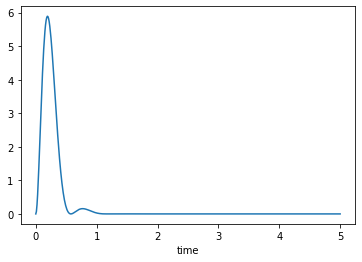

In [21]:
axes = trajectories['KE'].plot()

In [22]:
import matplotlib.pyplot as plt
from resonance.functions import spring

# create a new constant to describe the block's dimension, l
msd_sys.constants['l'] = 0.2  # m

def create_configuration_figure(x, l):

    # create a figure with one or more axes
    fig, ax = plt.subplots()

    # the `spring()` function creates the x and y data for plotting a simple
    # spring
    spring_x_data, spring_y_data = spring(0.0, x, l/2, l/2, l/8, n=3)
    lines = ax.plot(spring_x_data, spring_y_data, color='purple')
    spring_line = lines[0]

    # add a square that represents the mass
    square = plt.Rectangle((x, 0.0), width=l, height=l, color='orange')
    ax.add_patch(square)

    # add a vertical line representing the spring's attachment point
    ax.axvline(0.0, linewidth=4.0, color='black')

    # set axis limits and aspect ratio such that the entire motion will appear
    ax.set_ylim((-l/2, 3*l/2))
    ax.set_xlim((-np.abs(x) - l, np.abs(x) + l))
    ax.set_aspect('equal')

    ax.set_xlabel('$x$ [m]')
    ax.set_ylabel('$y$ [m]')

    # this function must return the figure as the first item
    # but you also may return any number of objects that you'd like to have
    # access to modify, e.g. for an animation update

    return fig, ax, spring_line, square

# associate the function with the system
msd_sys.config_plot_func = create_configuration_figure

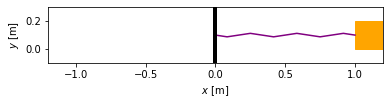

In [23]:
fig, ax, spring_line, square = msd_sys.plot_configuration()

In [24]:
msd_sys.constants['zeta'] = 0.1
trajectories = msd_sys.free_response(5.0)

In [25]:
def update_configuration(x, l, time,  # any variables you need for updating
                         ax, spring_line, square):  # returned items from plot_configuration() in same order

    ax.set_title('{:1.2f} [s]'.format(time))

    xs, ys = spring(0.0, x, l/2, l/2, l/8, n=3)
    spring_line.set_data(xs, ys)

    square.set_xy((x, 0.0))

msd_sys.config_plot_update_func = update_configuration

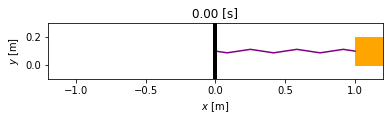

In [26]:
animation = msd_sys.animate_configuration(fps=30)

In [27]:
from IPython.display import HTML

HTML(animation.to_jshtml(fps=30))

In [28]:
msd_sys.coordinates['x'] = 0.0  # m
msd_sys.speeds['v'] = 0.0  # m/s

Fo = 10.0
omega = 2*np.pi*3.0  # rad/s

forced_trajectory = msd_sys.sinusoidal_forcing_response(Fo, omega, 5.0)

In [29]:
forced_trajectory

x      x_acc             v            KE  forcing_function
time                                                                   
0.00  0.000000  10.000000  6.938894e-18  2.407412e-35         10.000000
0.01  0.000496   9.679225  9.871978e-02  4.872797e-03          9.822873
0.02  0.001957   8.978820  1.923176e-01  1.849302e-02          9.297765
0.03  0.004313   7.924765  2.771159e-01  3.839662e-02          8.443279
0.04  0.007459   6.555691  3.497615e-01  6.116656e-02          7.289686
...        ...        ...           ...           ...               ...
4.96 -0.023218   8.674053 -3.722232e-01  6.927505e-02          7.289686
4.97 -0.026486   9.839976 -2.793765e-01  3.902562e-02          8.443279
4.98 -0.028773  10.655573 -1.765928e-01  1.559251e-02          9.297765
4.99 -0.029997  11.091961 -6.753058e-02  2.280189e-03          9.822873
5.00 -0.030115  11.133696  4.392935e-02  9.648938e-04         10.000000

[501 rows x 5 columns]

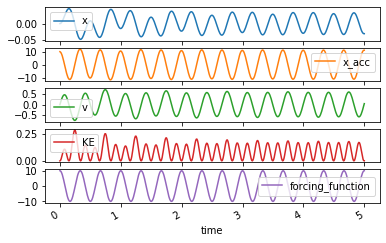

In [30]:
axes = forced_trajectory.plot(subplots=True)

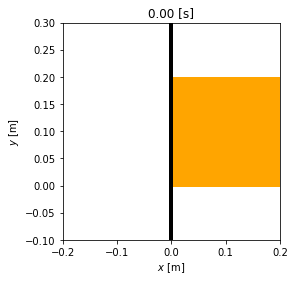

In [31]:
fps = 30
animation = msd_sys.animate_configuration(fps=fps)

In [32]:
HTML(animation.to_jshtml(fps=fps))

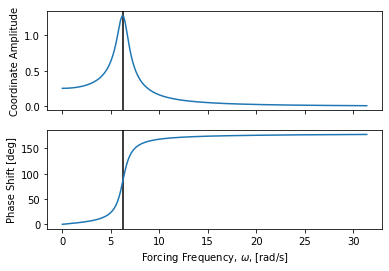

In [33]:
axes = msd_sys.frequency_response_plot(Fo)

In [34]:
def sawtooth_fourier_coeffs(A, N):
    """
    A : sawtooth amplitude, Newtons
    T : sawtooth period, seconds
    N : number of Fourier series terms
    """
    n = np.arange(1, N+1)
    an = A*(8*(-1)**n - 8) / 2 / np.pi**2 / n**2
    return 0, an, np.zeros_like(an)

a0, an, bn = sawtooth_fourier_coeffs(Fo, 20)

In [35]:
wb = 2*np.pi*3.0  # rad/s

trajectory = msd_sys.periodic_forcing_response(a0, an, bn, wb, 5.0)
trajectory

x      x_acc             v            KE  forcing_function
time                                                                       
0.00 -3.469447e-18  -9.797526 -6.938894e-18  2.407412e-35         -9.797526
0.01 -4.773325e-04  -8.653652 -9.344627e-02  4.366102e-03         -8.789924
0.02 -1.821290e-03  -7.332725 -1.731808e-01  1.499579e-02         -7.622252
0.03 -3.896544e-03  -5.927083 -2.395012e-01  2.868041e-02         -6.381879
0.04 -6.565825e-03  -4.583400 -2.921305e-01  4.267012e-02         -5.209711
...            ...        ...           ...           ...               ...
4.96  1.860597e-02  -6.335998  3.117475e-01  4.859327e-02         -5.209711
4.97  2.138612e-02  -7.530659  2.423054e-01  2.935596e-02         -6.381879
4.98  2.341220e-02  -8.748665  1.608547e-01  1.293711e-02         -7.622252
4.99  2.456569e-02  -9.845257  6.805327e-02  2.315623e-03         -8.789924
5.00  2.473372e-02 -10.728694 -3.603302e-02  6.491893e-04         -9.797526

[501 rows x 5 columns]

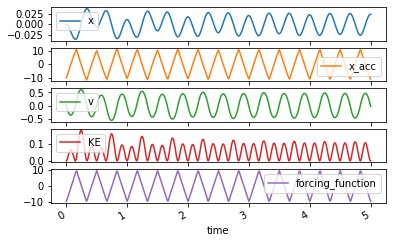

In [36]:
axes = trajectory.plot(subplots=True)

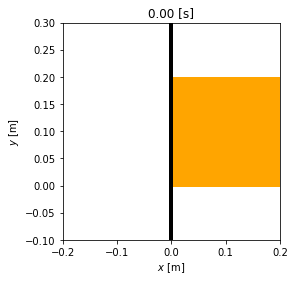

In [37]:
fps = 30
animation = msd_sys.animate_configuration(fps=fps)

In [38]:
HTML(animation.to_jshtml(fps=fps))